In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from cv19gm.cv19sim import CV19SIM
import cv19gm.utils.cv19functions as cv19functions

# Simulation

## SEIRHVD

In [2]:
dictToSend = { 'sim1':{
    "idSim": 1655141481920,
    "model": {
        "name": "SEIRHVD",
        "model": "SEIRHVD",
        "compartments": ['S','S_v','E','E_v','Im','Icr','Iv','R','H','D']
    },
    "data": {
        "datafile": False,
        "importdata": False,
        "initdate": "2020-03-22",
        "country": "USA",
        "state": [
            "30",
            "41",
            "06"
        ],
        "county": "",
        "healthservice": "",
        "loc_name": ""
    },
    "parameters": {
        "static": {
            "t_init": 0,
            "t_end": 500,
            "mu": 1.5,            
            "populationfraction": 1
        },
        "dynamic": {
            "beta": 0.3,
            "beta_v": 0.3,
            "alpha": 1,
            "tE_I": 0.3,
            "tI_R": 7,
            "rR_S": 0,            
            "vac_d": 0,
            "vac_eff": 1,
            "pE_Im": 0.85,
            "tE_Im": 3,
            "pE_Icr": 0.15,
            "tE_Icr": 3,
            "tEv_Iv": 3,
            "tIm_R": 7,
            "tIcr_H": 6,
            "pIv_R": 0.99,  
            "tIv_R": 7,
            "pIv_H": 0.01,
            "tIv_H": 7,
            "pH_R": 0.99,
            "tH_R": 9,
            "pH_D": 0.01,
            "tH_D": 9,
            "pR_S": 0,
            "tR_S": 60,
            "pI_det": 1,
            "pIcr_det": 1,
            "pIm_det": 1,
            "pIv_det": 1            
        }
    },
    "initialconditions": {
        'Sv': 1000,
        "I": 1500,
        "I_d": 200,
        "I_ac": 5000,
        "population": 1000000,
        "R": 83,
        "Iv": 150,
        "Iv_d": 50,
        "Iv_ac": 500,
        "H": 150,
        "H_d": 30,
        "H_cap": 3000,
        "D": 200,
        "D_d": 40
    }
}
}

In [3]:
dictToSend['sim1'].keys()

dict_keys(['idSim', 'model', 'data', 'parameters', 'initialconditions'])

In [4]:
dictToSend['sim1']['parameters']['static']

{'t_init': 0, 't_end': 500, 'mu': 1.5, 'populationfraction': 1}

In [6]:
res = requests.post('http://localhost:5003/simulate', json=dictToSend)
#res = requests.post('http://192.168.2.131:5003/simulate', json=dictToSend)
#print('response from server:',res.text)
dictFromServer = res.json()

In [7]:
response = json.loads(dictFromServer['results']['sim1'])

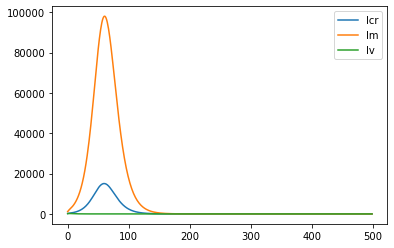

In [8]:
plt.plot(response['t'].values(),response['Icr'].values(),label='Icr')
plt.plot(response['t'].values(),response['Im'].values(),label='Im')
plt.plot(response['t'].values(),response['Iv'].values(),label='Iv')
plt.legend(loc=0)
plt.show()


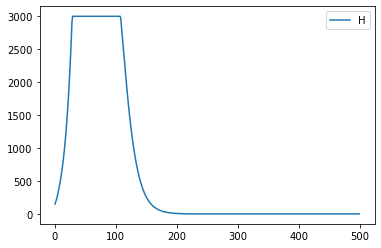

In [9]:
plt.plot(response['t'].values(),response['H'].values(),label='H')
plt.legend(loc=0)
plt.show()


## Function builder

In [10]:
dictToSend = {'t_init':490,'t_end':550,'function':{
            "function": "events",
            "values": [
              0.3,
              {
                "function": "transition",
                "ftype": 0,
                "initvalue": 0.3,
                "endvalue": 1,
                "concavity": 0,
                "t_init":500,
                "t_end":510
              }
            ],
            "days": [
              [
                0,
                500
              ],
              [
                500,
                540
              ]
            ],
            "default": 0.3
          }}

In [11]:
res = requests.post('http://localhost:5003/function', json=dictToSend)
print('response from server:',res.text)
dictFromServer = res.json()

response from server: {
  "results": {
    "function": [
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0

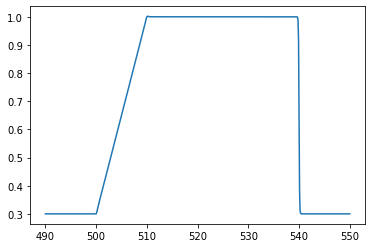

In [12]:
plt.plot(dictFromServer['results']['t'],dictFromServer['results']['function'])

In [13]:
np.linspace(0,10,101)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

## Test 2

In [14]:
a = """{
    "Model 4": {
        "idSim": 1663873337489,
        "model": {
            "model": "SEIRHVD",
            "name": "SEIRHVD",
            "compartments": [
                "S",
                "E",
                "I",
                "R",
                "H",
                "V",
                "D"
            ]
        },
        "data": {
            "datafile": false,
            "importdata": false,
            "initdate": "2020-03-22",
            "country": "USA",
            "state": [
                "30",
                "41"
            ],
            "county": "",
            "healthservice": "",
            "loc_name": ""
        },
        "parameters": {
            "static": {
                "t_init": 0,
                "t_end": 500,
                "mu": 1.5,
                "populationfraction": 1
            },
            "dynamic": {
                "beta": 0.3,
                "beta_v": 0.15,
                "alpha": 1,
                "tE_I": 5,
                "tI_R": 7,
                "rR_S": 0,                
                "vac_d": 0,
                "vac_eff": 1,
                "pE_Im": 0.85,
                "tE_Im": 3,
                "pE_Icr": 0.15,
                "tE_Icr": 3,
                "tEv_Iv": 3,
                "tIm_R": 7,
                "tIcr_H": 6,
                "pIv_R": 0.99,
                "tIv_R": 7,
                "pIv_H": 0.01,
                "tIv_H": 7,
                "pH_R": 0.99,
                "tH_R": 9,
                "pH_D": 0.01,
                "tH_D": 9,
                "pR_S": 0,
                "tR_S": 60,
                "pI_det": 1,
                "pIcr_det": 1,
                "pIm_det": 1,
                "pIv_det": 1
            }
        },
        "initialconditions": {
            "Sv": 555,
            "I": 25013,
            "I_d": 1593,
            "I_ac": 1037769,
            "population": 5286515,
            "R": 75,
            "Iv": 85455,
            "Iv_d": 4780,
            "Iv_ac": 9567033,
            "H": 465603,
            "H_d": 469,
            "H_cap":5555,
            "D": 28411,
            "D_d":1            
        }
    }
}
"""

In [15]:
res = requests.post('http://localhost:5003/simulate', json=json.loads(a))
#print('response from server:',res.text)
dictFromServer = res.json()

In [16]:
response = json.loads(dictFromServer['results']['Model 4'])

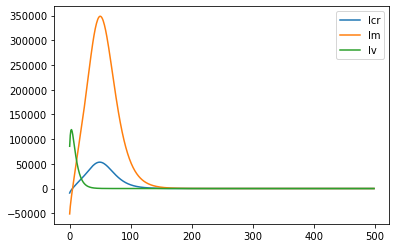

In [17]:
plt.plot(response['t'].values(),response['Icr'].values(),label='Icr')
plt.plot(response['t'].values(),response['Im'].values(),label='Im')
plt.plot(response['t'].values(),response['Iv'].values(),label='Iv')
plt.legend(loc=0)
plt.show()

In [18]:
json.loads(a)['Model 4'].keys()

dict_keys(['idSim', 'model', 'data', 'parameters', 'initialconditions'])

In [19]:
json.loads(a)['Model 4']['parameters']['static']

{'t_init': 0, 't_end': 500, 'mu': 1.5, 'populationfraction': 1}

## Data Fit

In [31]:
beta_values = [0.2,0.3,0.15,0.4]
beta_days = [50,65,80]
mu = 2.5

In [32]:
cfg = 'SEIR.toml'
beta = cv19functions.piecewise(values = beta_values,limits=beta_days)

sims = CV19SIM(config=cfg,beta=beta,mu=mu,t_end=200)
sims.solve()

sim = sims.sims[0]
I_d_data = sim.I_d
t_data = sim.t

In [33]:
sim.results[['I_d','t']].to_json()

'{"I_d":{"0":3000,"1":2885,"2":2704,"3":2562,"4":2478,"5":2448,"6":2462,"7":2510,"8":2583,"9":2677,"10":2786,"11":2909,"12":3042,"13":3186,"14":3338,"15":3498,"16":3665,"17":3839,"18":4020,"19":4208,"20":4402,"21":4603,"22":4809,"23":5022,"24":5240,"25":5463,"26":5691,"27":5924,"28":6161,"29":6401,"30":6644,"31":6890,"32":7138,"33":7387,"34":7636,"35":7886,"36":8134,"37":8380,"38":8623,"39":8862,"40":9097,"41":9325,"42":9547,"43":9760,"44":9964,"45":10158,"46":10341,"47":10511,"48":10668,"49":10810,"50":10941,"51":11450,"52":12274,"53":13107,"54":13864,"55":14524,"56":15094,"57":15580,"58":15989,"59":16326,"60":16594,"61":16794,"62":16927,"63":16995,"64":16998,"65":16930,"66":16263,"67":15111,"68":13918,"69":12823,"70":11851,"71":10993,"72":10234,"73":9555,"74":8944,"75":8389,"76":7882,"77":7414,"78":6980,"79":6576,"80":6203,"81":6305,"82":6776,"83":7233,"84":7572,"85":7788,"86":7895,"87":7914,"88":7865,"89":7765,"90":7623,"91":7450,"92":7252,"93":7039,"94":6813,"95":6579,"96":6339,"97

In [34]:
list(I_d_data.astype(int))[0]

3000

In [35]:
dictToSend = {'tE_I':5,'tI_R':10,'I_d_data':sim.results['I_d'].to_json(),'t_data':sim.results['t'].to_json()}

In [36]:
dictToSend = {'tE_I':{
        "t_init": 0,
        "t_end": 500,
        "function": '{"function":"events","values":[0.45,0.85],"days":[[0,10],[10,20]]}'
    },
              'tI_R':10,'I_d_data':sim.results['I_d'].to_json(),'t_data':sim.results['t'].to_json()}

In [37]:
print(dictToSend)

{'tE_I': {'t_init': 0, 't_end': 500, 'function': '{"function":"events","values":[0.45,0.85],"days":[[0,10],[10,20]]}'}, 'tI_R': 10, 'I_d_data': '{"0":3000,"1":2885,"2":2704,"3":2562,"4":2478,"5":2448,"6":2462,"7":2510,"8":2583,"9":2677,"10":2786,"11":2909,"12":3042,"13":3186,"14":3338,"15":3498,"16":3665,"17":3839,"18":4020,"19":4208,"20":4402,"21":4603,"22":4809,"23":5022,"24":5240,"25":5463,"26":5691,"27":5924,"28":6161,"29":6401,"30":6644,"31":6890,"32":7138,"33":7387,"34":7636,"35":7886,"36":8134,"37":8380,"38":8623,"39":8862,"40":9097,"41":9325,"42":9547,"43":9760,"44":9964,"45":10158,"46":10341,"47":10511,"48":10668,"49":10810,"50":10941,"51":11450,"52":12274,"53":13107,"54":13864,"55":14524,"56":15094,"57":15580,"58":15989,"59":16326,"60":16594,"61":16794,"62":16927,"63":16995,"64":16998,"65":16930,"66":16263,"67":15111,"68":13918,"69":12823,"70":11851,"71":10993,"72":10234,"73":9555,"74":8944,"75":8389,"76":7882,"77":7414,"78":6980,"79":6576,"80":6203,"81":6305,"82":6776,"83":7

In [38]:
res = requests.post('http://192.168.2.131:5003/datafit', json=dictToSend)
print('response from server:',res.text)
dictFromServer = res.json()

response from server: <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
  "http://www.w3.org/TR/html4/loose.dtd">
<html>
  <head>
    <title>TypeError: &#x27;dict&#x27; object is not callable // Werkzeug Debugger</title>
    <link rel="stylesheet" href="?__debugger__=yes&amp;cmd=resource&amp;f=style.css"
        type="text/css">
    <!-- We need to make sure this has a favicon so that the debugger does
         not accidentally trigger a request to /favicon.ico which might
         change the application's state. -->
    <link rel="shortcut icon"
        href="?__debugger__=yes&amp;cmd=resource&amp;f=console.png">
    <script src="?__debugger__=yes&amp;cmd=resource&amp;f=debugger.js"></script>
    <script type="text/javascript">
      var TRACEBACK = 140660788520656,
          CONSOLE_MODE = false,
          EVALEX = true,
          EVALEX_TRUSTED = false,
          SECRET = "Yrg0mRkkZD8mtaGFRUE6";
    </script>
  </head>
  <body style="background-color: #fff">
    <div cl

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [46]:
json.loads(json.loads(res.text)['results']['simulation']).keys()

dict_keys(['t', 'dates', 'S', 'E', 'E_d', 'I', 'I_d', 'R', 'R_d', 'Flux', 'E_ac', 'I_ac', 'R_ac', 'I_det', 'I_d_det', 'I_ac_det', 'prevalence_total', 'prevalence_susc', 'prevalence_det'])

## Test 2

In [37]:
dictToSend = { 'sim1':{
    "tE_I": {
        "rangeDays": [
            [
                0,
                500
            ]
        ],
        "type": [
            {
                "name": "static",
                "value": 5
            }
        ],
        "name": "tE_I",
        "default": 7,
        "isEnabled": False,
        "val": "5.00"
    },
    "tI_R": {
        "rangeDays": [
            [
                0,
                500
            ]
        ],
        "type": [
            {
                "name": "static",
                "value": 10
            }
        ],
        "name": "tI_R",
        "default": 7,
        "isEnabled": False,
        "val": "10.00"
    },
    "I_d_data": "{\"0\":3000,\"1\":2885,\"2\":2704,\"3\":2562,\"4\":2478,\"5\":2448,\"6\":2462,\"7\":2510,\"8\":2583,\"9\":2677,\"10\":2786,\"11\":2909,\"12\":3042,\"13\":3186,\"14\":3338,\"15\":3498,\"16\":3665,\"17\":3839,\"18\":4020,\"19\":4208,\"20\":4402,\"21\":4603,\"22\":4809,\"23\":5022,\"24\":5240,\"25\":5463,\"26\":5691,\"27\":5924,\"28\":6161,\"29\":6401,\"30\":6644,\"31\":6890,\"32\":7138,\"33\":7387,\"34\":7636,\"35\":7886,\"36\":8134,\"37\":8380,\"38\":8623,\"39\":8862,\"40\":9097,\"41\":9325,\"42\":9547,\"43\":9760,\"44\":9964,\"45\":10158,\"46\":10341,\"47\":10511,\"48\":10668,\"49\":10810,\"50\":10941,\"51\":11450,\"52\":12274,\"53\":13107,\"54\":13864,\"55\":14524,\"56\":15094,\"57\":15580,\"58\":15989,\"59\":16326,\"60\":16594,\"61\":16794,\"62\":16927,\"63\":16995,\"64\":16998,\"65\":16930,\"66\":16263,\"67\":15111,\"68\":13918,\"69\":12823,\"70\":11851,\"71\":10993,\"72\":10234,\"73\":9555,\"74\":8944,\"75\":8389,\"76\":7882,\"77\":7414,\"78\":6980,\"79\":6576,\"80\":6203,\"81\":6305,\"82\":6776,\"83\":7233,\"84\":7572,\"85\":7788,\"86\":7895,\"87\":7914,\"88\":7865,\"89\":7765,\"90\":7623,\"91\":7450,\"92\":7252,\"93\":7039,\"94\":6813,\"95\":6579,\"96\":6339,\"97\":6095,\"98\":5850,\"99\":5604,\"100\":5360,\"101\":5119,\"102\":4883,\"103\":4652,\"104\":4428,\"105\":4211,\"106\":4000,\"107\":3797,\"108\":3602,\"109\":3414,\"110\":3234,\"111\":3061,\"112\":2896,\"113\":2738,\"114\":2587,\"115\":2444,\"116\":2308,\"117\":2178,\"118\":2056,\"119\":1940,\"120\":1830,\"121\":1725,\"122\":1627,\"123\":1534,\"124\":1446,\"125\":1363,\"126\":1284,\"127\":1210,\"128\":1140,\"129\":1075,\"130\":1013,\"131\":954,\"132\":899,\"133\":847,\"134\":798,\"135\":752,\"136\":708,\"137\":667,\"138\":629,\"139\":593,\"140\":558,\"141\":526,\"142\":496,\"143\":467,\"144\":440,\"145\":415,\"146\":391,\"147\":368,\"148\":347,\"149\":327,\"150\":308,\"151\":291,\"152\":274,\"153\":258,\"154\":243,\"155\":229,\"156\":216,\"157\":204,\"158\":192,\"159\":181,\"160\":170,\"161\":160,\"162\":151,\"163\":142,\"164\":134,\"165\":127,\"166\":119,\"167\":112,\"168\":106,\"169\":100,\"170\":94,\"171\":89,\"172\":84,\"173\":79,\"174\":74,\"175\":70,\"176\":66,\"177\":62,\"178\":59,\"179\":55,\"180\":52,\"181\":49,\"182\":46,\"183\":44,\"184\":41,\"185\":39,\"186\":37,\"187\":34,\"188\":32,\"189\":31,\"190\":29,\"191\":27,\"192\":26,\"193\":24,\"194\":23,\"195\":21,\"196\":20,\"197\":19,\"198\":18,\"199\":17}",
    "t_data": "{\"0\":0,\"1\":1,\"2\":2,\"3\":3,\"4\":4,\"5\":5,\"6\":6,\"7\":7,\"8\":8,\"9\":9,\"10\":10,\"11\":11,\"12\":12,\"13\":13,\"14\":14,\"15\":15,\"16\":16,\"17\":17,\"18\":18,\"19\":19,\"20\":20,\"21\":21,\"22\":22,\"23\":23,\"24\":24,\"25\":25,\"26\":26,\"27\":27,\"28\":28,\"29\":29,\"30\":30,\"31\":31,\"32\":32,\"33\":33,\"34\":34,\"35\":35,\"36\":36,\"37\":37,\"38\":38,\"39\":39,\"40\":40,\"41\":41,\"42\":42,\"43\":43,\"44\":44,\"45\":45,\"46\":46,\"47\":47,\"48\":48,\"49\":49,\"50\":50,\"51\":51,\"52\":52,\"53\":53,\"54\":54,\"55\":55,\"56\":56,\"57\":57,\"58\":58,\"59\":59,\"60\":60,\"61\":61,\"62\":62,\"63\":63,\"64\":64,\"65\":65,\"66\":66,\"67\":67,\"68\":68,\"69\":69,\"70\":70,\"71\":71,\"72\":72,\"73\":73,\"74\":74,\"75\":75,\"76\":76,\"77\":77,\"78\":78,\"79\":79,\"80\":80,\"81\":81,\"82\":82,\"83\":83,\"84\":84,\"85\":85,\"86\":86,\"87\":87,\"88\":88,\"89\":89,\"90\":90,\"91\":91,\"92\":92,\"93\":93,\"94\":94,\"95\":95,\"96\":96,\"97\":97,\"98\":98,\"99\":99,\"100\":100,\"101\":101,\"102\":102,\"103\":103,\"104\":104,\"105\":105,\"106\":106,\"107\":107,\"108\":108,\"109\":109,\"110\":110,\"111\":111,\"112\":112,\"113\":113,\"114\":114,\"115\":115,\"116\":116,\"117\":117,\"118\":118,\"119\":119,\"120\":120,\"121\":121,\"122\":122,\"123\":123,\"124\":124,\"125\":125,\"126\":126,\"127\":127,\"128\":128,\"129\":129,\"130\":130,\"131\":131,\"132\":132,\"133\":133,\"134\":134,\"135\":135,\"136\":136,\"137\":137,\"138\":138,\"139\":139,\"140\":140,\"141\":141,\"142\":142,\"143\":143,\"144\":144,\"145\":145,\"146\":146,\"147\":147,\"148\":148,\"149\":149,\"150\":150,\"151\":151,\"152\":152,\"153\":153,\"154\":154,\"155\":155,\"156\":156,\"157\":157,\"158\":158,\"159\":159,\"160\":160,\"161\":161,\"162\":162,\"163\":163,\"164\":164,\"165\":165,\"166\":166,\"167\":167,\"168\":168,\"169\":169,\"170\":170,\"171\":171,\"172\":172,\"173\":173,\"174\":174,\"175\":175,\"176\":176,\"177\":177,\"178\":178,\"179\":179,\"180\":180,\"181\":181,\"182\":182,\"183\":183,\"184\":184,\"185\":185,\"186\":186,\"187\":187,\"188\":188,\"189\":189,\"190\":190,\"191\":191,\"192\":192,\"193\":193,\"194\":194,\"195\":195,\"196\":196,\"197\":197,\"198\":198,\"199\":199,\"200\":200,\"201\":201,\"202\":202,\"203\":203,\"204\":204,\"205\":205,\"206\":206,\"207\":207,\"208\":208,\"209\":209,\"210\":210,\"211\":211,\"212\":212,\"213\":213,\"214\":214,\"215\":215,\"216\":216,\"217\":217,\"218\":218,\"219\":219,\"220\":220,\"221\":221,\"222\":222,\"223\":223,\"224\":224,\"225\":225,\"226\":226,\"227\":227,\"228\":228,\"229\":229,\"230\":230,\"231\":231,\"232\":232,\"233\":233,\"234\":234,\"235\":235,\"236\":236,\"237\":237,\"238\":238,\"239\":239,\"240\":240,\"241\":241,\"242\":242,\"243\":243,\"244\":244,\"245\":245,\"246\":246,\"247\":247,\"248\":248,\"249\":249,\"250\":250,\"251\":251,\"252\":252,\"253\":253,\"254\":254,\"255\":255,\"256\":256,\"257\":257,\"258\":258,\"259\":259,\"260\":260,\"261\":261,\"262\":262,\"263\":263,\"264\":264,\"265\":265,\"266\":266,\"267\":267,\"268\":268,\"269\":269,\"270\":270,\"271\":271,\"272\":272,\"273\":273,\"274\":274,\"275\":275,\"276\":276,\"277\":277,\"278\":278,\"279\":279,\"280\":280,\"281\":281,\"282\":282,\"283\":283,\"284\":284,\"285\":285,\"286\":286,\"287\":287,\"288\":288,\"289\":289,\"290\":290,\"291\":291,\"292\":292,\"293\":293,\"294\":294,\"295\":295,\"296\":296,\"297\":297,\"298\":298,\"299\":299,\"300\":300,\"301\":301,\"302\":302,\"303\":303,\"304\":304,\"305\":305,\"306\":306,\"307\":307,\"308\":308,\"309\":309,\"310\":310,\"311\":311,\"312\":312,\"313\":313,\"314\":314,\"315\":315,\"316\":316,\"317\":317,\"318\":318,\"319\":319,\"320\":320,\"321\":321,\"322\":322,\"323\":323,\"324\":324,\"325\":325,\"326\":326,\"327\":327,\"328\":328,\"329\":329,\"330\":330,\"331\":331,\"332\":332,\"333\":333,\"334\":334,\"335\":335,\"336\":336,\"337\":337,\"338\":338,\"339\":339,\"340\":340,\"341\":341,\"342\":342,\"343\":343,\"344\":344,\"345\":345,\"346\":346,\"347\":347,\"348\":348,\"349\":349,\"350\":350,\"351\":351,\"352\":352,\"353\":353,\"354\":354,\"355\":355,\"356\":356,\"357\":357,\"358\":358,\"359\":359,\"360\":360,\"361\":361,\"362\":362,\"363\":363,\"364\":364,\"365\":365,\"366\":366,\"367\":367,\"368\":368,\"369\":369,\"370\":370,\"371\":371,\"372\":372,\"373\":373,\"374\":374,\"375\":375,\"376\":376,\"377\":377,\"378\":378,\"379\":379,\"380\":380,\"381\":381,\"382\":382,\"383\":383,\"384\":384,\"385\":385,\"386\":386,\"387\":387,\"388\":388,\"389\":389,\"390\":390,\"391\":391,\"392\":392,\"393\":393,\"394\":394,\"395\":395,\"396\":396,\"397\":397,\"398\":398,\"399\":399,\"400\":400,\"401\":401,\"402\":402,\"403\":403,\"404\":404,\"405\":405,\"406\":406,\"407\":407,\"408\":408,\"409\":409,\"410\":410,\"411\":411,\"412\":412,\"413\":413,\"414\":414,\"415\":415,\"416\":416,\"417\":417,\"418\":418,\"419\":419,\"420\":420,\"421\":421,\"422\":422,\"423\":423,\"424\":424,\"425\":425,\"426\":426,\"427\":427,\"428\":428,\"429\":429,\"430\":430,\"431\":431,\"432\":432,\"433\":433,\"434\":434,\"435\":435,\"436\":436,\"437\":437,\"438\":438,\"439\":439,\"440\":440,\"441\":441,\"442\":442,\"443\":443,\"444\":444,\"445\":445,\"446\":446,\"447\":447,\"448\":448,\"449\":449,\"450\":450,\"451\":451,\"452\":452,\"453\":453,\"454\":454,\"455\":455,\"456\":456,\"457\":457,\"458\":458,\"459\":459,\"460\":460,\"461\":461,\"462\":462,\"463\":463,\"464\":464,\"465\":465,\"466\":466,\"467\":467,\"468\":468,\"469\":469,\"470\":470,\"471\":471,\"472\":472,\"473\":473,\"474\":474,\"475\":475,\"476\":476,\"477\":477,\"478\":478,\"479\":479,\"480\":480,\"481\":481,\"482\":482,\"483\":483,\"484\":484,\"485\":485,\"486\":486,\"487\":487,\"488\":488,\"489\":489,\"490\":490,\"491\":491,\"492\":492,\"493\":493,\"494\":494,\"495\":495,\"496\":496,\"497\":497,\"498\":498,\"499\":499}"
}}

In [38]:
#res = requests.post('http://192.168.2.131:5003/datafit', json=dictToSend)
res = requests.post('http://localhost:5003/datafit', json=dictToSend)
print('response from server:',res.text)
dictFromServer = res.json()

response from server: <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
  "http://www.w3.org/TR/html4/loose.dtd">
<html>
  <head>
    <title>KeyError: 'I_d_data' // Werkzeug Debugger</title>
    <link rel="stylesheet" href="?__debugger__=yes&amp;cmd=resource&amp;f=style.css"
        type="text/css">
    <!-- We need to make sure this has a favicon so that the debugger does
         not by accident trigger a request to /favicon.ico which might
         change the application state. -->
    <link rel="shortcut icon"
        href="?__debugger__=yes&amp;cmd=resource&amp;f=console.png">
    <script src="?__debugger__=yes&amp;cmd=resource&amp;f=jquery.js"></script>
    <script src="?__debugger__=yes&amp;cmd=resource&amp;f=debugger.js"></script>
    <script type="text/javascript">
      var TRACEBACK = 140243754970272,
          CONSOLE_MODE = false,
          EVALEX = true,
          EVALEX_TRUSTED = false,
          SECRET = "BEfGHMy5sBXHgEGqi5ry";
    </script>
  </head>
  <bo

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
json.loads(json.loads(res.text)['results']['simulation']).keys()

dict_keys(['t', 'dates', 'S', 'E', 'E_d', 'I', 'I_d', 'R', 'R_d', 'Flux', 'E_ac', 'I_ac', 'R_ac', 'I_det', 'I_d_det', 'I_ac_det', 'prevalence_total', 'prevalence_susc', 'prevalence_det'])